##### Test implementation of Function Tensor Train's basis functions 

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# Get the path to the parent directory (one level up)
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add 'src' directory to sys.path
src_path = os.path.join(parent_dir, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

from basis_functions import legendre_recurrence, OrthonormalLegendre1D, BSpline1D, Fourier1D

In [15]:
# Test implementation of Legendre recurrence
x = torch.tensor([0.5])
legendre_recurrence(x, torch.eye(5, dtype=float)).T

tensor([[ 1.0000,  0.5000, -0.1250, -0.4375, -0.2891]], dtype=torch.float64)

In [22]:
# Test implementation of orthonormal Legendre basis
dimension = 3
d = 1
bases = [
        OrthonormalLegendre1D(torch.eye(dimension, dtype=float), domain=(-5., 5.))
        for _ in range(d)
        ]
print(f"Dimension: {bases[0].dimension}")

Dimension: 3


Text(0.5, 1.0, 'Orthonormal Legendre 1D')

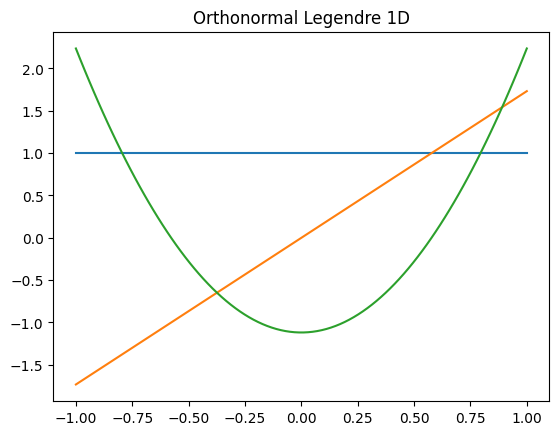

In [30]:
legendre = OrthonormalLegendre1D(torch.eye(dimension, dtype=float), domain=(-1., 1.))
x = np.linspace(-1., 1., 100)
y = [legendre(torch.tensor(x[i])).detach().numpy() for i in range(100)]
plt.plot(x, y)
plt.title("Orthonormal Legendre 1D")

In [16]:
# Test implementation of B-spline basis
degree = 3
d = 2
bases = [
        BSpline1D(torch.linspace(-1, 1, 12), degree)
        for _ in range(d)
        ]
print(f"Dimension: {bases[0].dimension}")

Dimension: 8


Text(0.5, 1.0, 'B-Spline 1D')

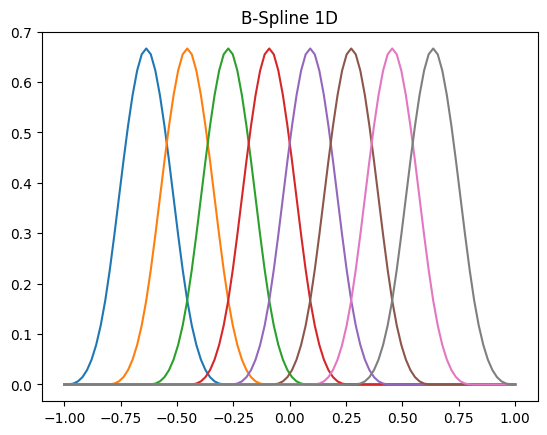

In [17]:
b_spline = BSpline1D(torch.linspace(-1., 1., 12), degree)
x = np.linspace(-1., 1., 100)
y = [b_spline(torch.tensor(x[i])) for i in range(100)]
plt.plot(x, y)
plt.title("B-Spline 1D")

In [2]:
# Test implementation of Fourier basis
dimension = 5
d = 2
bases = [
        Fourier1D(n=dimension, domain=(-2.5, 2.5))
        for _ in range(d)
        ]
print(f"Dimension: {bases[0].dimension}")

Dimension: 5


Text(0.5, 1.0, 'Fourier 1D')

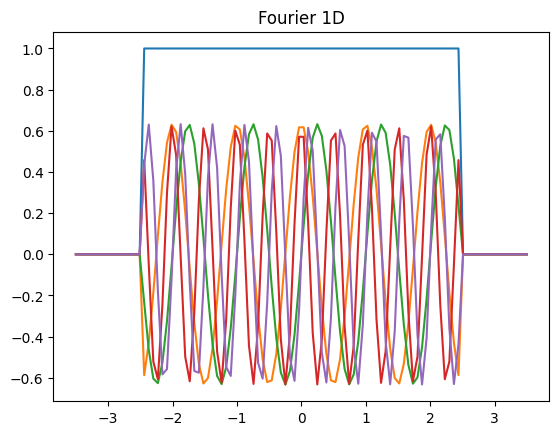

In [6]:
fourier = Fourier1D(dimension, domain=(-2.5,2.5), normalize=True, period=1)
x = np.linspace(-3.5, 3.5, 100)
y = [fourier(torch.tensor(x[i])) for i in range(100)]
plt.plot(x, y)
plt.title("Fourier 1D")